# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

# Table of Contents:
1. [Open the data and study the general information](#Open-the-data-file-and-study-the-general-information.)
2. [Data preprocessing](#Data-preprocessing)<br>
    [Make calculations and add them to the table](#Make-calculations-and-add-them-to-the-table)
3. [Exploratory data analysis](#Carry-out-exploratory-data-analysis)
4. [Price factors analysis](#Prices-analysis)
5. [Overall conclusion](#Overall-conclusion)

In [1]:
# libraries cell
import pandas as pd
import matplotlib.pyplot as plt
import sidetable

## Open the data file and study the general information. 

In [2]:
try:
    data_raw = pd.read_csv('/datasets/vehicles_us.csv') # open file on hub
except: 
    data_raw = pd.read_csv('datasets/vehicles_us.csv') # open file locally
    

In [3]:
# looking at the data
print(data_raw.info())
print()
data_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
data_raw.describe() # numeric columns

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [5]:
data_raw.describe(include = [object]) # object columns

,model,condition,fuel,transmission,type,paint_color,date_posted
count,51525,51525,51525,51525,51525,42258,51525
unique,100,6,5,3,13,12,354
top,ford f-150,excellent,gas,automatic,SUV,white,2019-03-17
freq,2796,24773,47288,46902,12405,10029,186


### Conclusion

Looks like I have both quantitative and categorical columns to adress to. Some column's values are missing:

* Categorical: model_year, cylinders, paint_color - I will have to look for reason and check if I can replace them with other values. If not, I will replace them with string that indicates I don't have that info, like 'Unknown'.
* Quantitative: only odometer. After closer look at this column I will check whether to replace missing values with mean or median and by what category.
* is_4wd: looks like boolean category to me, and I don't think it has any actual missing values. Most likely it has 1.0 for 'Yes' and an empty cell for 'No'.

Most likely, missing values wasn't mandatory to fill from the beginning, so publishers of those ads didn't fill them for various reasons: didn't know how to, or just didn't want to.

Price column has an unreasonable low minimum low value. I suggest it appears because it was mandatory to enter the price and not everyone wanted to publish it openly, so they just entered lowest number possible.

Also I see needlesly 'float'ed columns, which I would prefer to see as 'int' type.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-Contents:)

## Data preprocessing

In [6]:
## missing values stats:

data_raw.stb.missing()

,missing,total,percent
is_4wd,25953,51525,50.369723
paint_color,9267,51525,17.985444
odometer,7892,51525,15.316836
cylinders,5260,51525,10.208637
model_year,3619,51525,7.023775
price,0,51525,0.000000
model,0,51525,0.000000
condition,0,51525,0.000000
fuel,0,51525,0.000000
transmission,0,51525,0.000000


In [7]:
# look at the correlation matrix to check which values are correlating:
data_raw.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,NaN,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,NaN,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,NaN,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,NaN,0.003804
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,-0.000682,-0.005703,0.005517,0.003804,NaN,1.000000


In [8]:
## replace empty values in 'is_4wd' column by zeroes and take a look at it
data_raw['is_4wd'] = data_raw['is_4wd'].fillna(0)
data_raw['is_4wd'].unique()

array([1., 0.])

#### Notes:

* The strongest correllation the 'cylinders' column has is with 'is_4wd' column, which is boolean and has no filled values. I don't have a way to know why 'cylinders' have missing values, most likely it's due to human factor and personal preferences of advertisers: not everyone likes to share the whole information they have, some of the people don't know the exact numbers, etc. So looks like the best way to fill those values is by 'is_4wd' column.


* I also don't have a way to know why 'odometer' values are missing. Most likely it is also due to human factor: someone didn't want to publish it openly because thought it may affect chances to sell the car, someone just didn't know or didn't care. But it is reasonable to assume that  'model_year' is affecting mileage values: the older vehicle is, the larger it's mileage numbers are. Luckily, 'odometer' column is correlated to 'model year' and I can to fill it by it, but I have to fill the missing 'model_year' values first.

In [9]:
## filling the missing 'cylinders' column by 'is_4wd':

data_raw['cylinders'] = data_raw['cylinders'].fillna(data_raw.groupby('is_4wd')['cylinders'].transform('median'))

# check the result:
print(data_raw.cylinders.isna().sum())

0


In [10]:
# I know that certain models are produced in certain years range, so I check if 'model' and 'model_year' columns are connected.

data_raw.pivot_table(
    # count column - to make sure this model has enough values
    index = 'model', values = 'model_year', aggfunc = ['median', 'count'] 
).sort_values(('median','model_year'), ascending = False).head(10)

,median,count
,model_year,model_year
model,,
nissan frontier crew cab sv,2018.0,316
chevrolet camaro lt coupe 2d,2017.0,293
chevrolet silverado 1500 crew,2016.0,282
ford mustang gt coupe 2d,2016.0,283
ford f150 supercrew cab xlt,2015.0,307
chevrolet colorado,2015.0,264
nissan rogue,2015.0,431
chrysler 200,2014.0,224


In [11]:
# 'model' more or less connected to 'model_year'. So I fill 'model_year' values by 'model':
data_raw['model_year'] = data_raw['model_year'].fillna(data_raw.groupby('model')['model_year'].transform('median'))

# check the result:
print(data_raw.cylinders.isna().sum())

0


In [12]:
# fill 'odometer' values by 'model_year' (as I described above in my notes):
# 'model' more or less connected to 'model_year'. So I fill 'model_year' values by 'model':
data_raw['odometer'] = data_raw['odometer'].fillna(data_raw.groupby('model_year')['odometer'].transform('median'))

# check the result:
print(data_raw.odometer.isna().sum())

1


#### Notes: 

I still have one cell with missing odometer value. I am going to check what the model year is and if I can fill it in any other way:

In [13]:
data_raw[data_raw['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59


#### Notes:

Obviously year 1929 is a rare one. In this case I will fill this cell with median value by antique cars. For the sake of this I am going decide that any car produced before 1980 is an antique one. How many of those do I have?

In [14]:
data_raw.query('model_year < 1980').model_year.count()

191

In [15]:
# looks like enough. 
# Fill last missing odometer value:
data_raw['odometer'] = data_raw['odometer'].fillna(data_raw.query('model_year < 1980')['odometer'].median())

# check the result:
print(data_raw.odometer.isna().sum())

0


In [16]:
# check low 'price' values:

data_raw['price'].sort_values().head()

8115     1
11634    1
3063     1
11402    1
11633    1
Name: price, dtype: int64

In [17]:
# looks like I have more than a few of those. How many exactly?

print('Share of "1" price values:', round(data_raw.query('price == 1')['price'].count() / len(data_raw), 3))

# check if I have other low values:

data_raw.query('price > 1')['price'].sort_values().head()

Share of "1" price values: 0.015


44205     3
50430     5
31263     6
39379     9
50971    10
Name: price, dtype: int64

**Notes**:

Looks like I have another low values apart from 1, but in much lower quantities each. I believe those other low values could also be entered because people couldn't post an add without price and had to enter something, but also they can mean price in thousands. I don't have a way to know, and later I will have to drop those rows - I will determine where outliers start when I'll see the graphs.

**Notes** - 'paint_color': 

There are 18% of missing values in 'paint_color' - that's a lot! Also this is a categorical column so I don't really have a way to calculate some average value by category (or even by a few categories). I am going to fill those values with 'unknown': this way I won't have missing cells and I will know this specific value shouldn't be included in any analysis by color.

In [18]:
#replace missing 'pain_color' values with 'unknown':
data_raw['paint_color'] = data_raw['paint_color'].fillna('unknown')

#check if everything worked as it should
data_raw['paint_color'].isna().sum() 

0

In [24]:
# create a list of columns containing numbers
number_columns = ['price', 'model_year', 'cylinders', 'odometer', 'days_listed']

# and convert all of them to ints to optimize work process and avoid possible errors
data_raw[number_columns] = data_raw[number_columns].astype('int32')

# convert is_4wd column to 'bool' type:
data_raw['is_4wd'] = data_raw['is_4wd'].astype('bool')


# taking a look to check that I didn't miss anything
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int32 
 1   model_year    51525 non-null  int32 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int32 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int32 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  bool  
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int32 
dtypes: bool(1), int32(5), object(7)
memory usage: 3.8+ MB


In [20]:
# check unique text values to see if I have duplicates and to check if categorization is needed:
text_columns = ['model', 'fuel', 'transmission', 'type', 'paint_color']

for column in text_columns:
    print(data_raw[column].unique())

['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet camaro' 'f

**Notes**:

All the columns except 'model' look OK: no duplicates, well-defined categories. 

The 'model' column is more complicated. It seems it was filled by freestyle text, with no predefined choices, so it has a lot of values, some of them are duplicated. Sorting this column by brand could oversimplify the data, and excluding duplicated models seems to be needlessly complicated: it is a lot of work, and I don't have any project task that may need categorization of this column. If such a need will arise, I will process this column then.

In [25]:
# separate only the relevant categories into new dataframe:

data = data_raw[[
    'price', 'model_year', 'model', 'condition', 'cylinders', 'odometer', 'is_4wd', 'transmission', 'type', 'paint_color',
    'date_posted', 'days_listed'
]]

data.head()

,price,model_year,model,condition,cylinders,odometer,is_4wd,transmission,type,paint_color,date_posted,days_listed
0,9400,2011,bmw x5,good,6,145000,True,automatic,SUV,unknown,2018-06-23,19
1,25500,2011,ford f-150,good,6,88705,True,automatic,pickup,white,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,110000,False,automatic,sedan,red,2019-02-07,79
3,1500,2003,ford f-150,fair,8,161397,False,automatic,pickup,unknown,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,80903,False,automatic,sedan,black,2019-04-02,28


In [26]:
# convert column to datetime format
data['date_posted'] = pd.to_datetime(data['date_posted'], format = '%Y-%m-%d') 

# check for duplicates
print(data.duplicated().sum()) 

0


<ipython-input-26-4d681e4b0ab8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_posted'] = pd.to_datetime(data['date_posted'], format = '%Y-%m-%d')


In [27]:
data.info() #last look at the preprocessed dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int32         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   odometer      51525 non-null  int32         
 6   is_4wd        51525 non-null  bool          
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  date_posted   51525 non-null  datetime64[ns]
 11  days_listed   51525 non-null  int32         
dtypes: bool(1), datetime64[ns](1), int32(5), object(5)
memory usage: 3.4+ MB


#### <font color='Purple'>Notes:</font>

After thorough reading of the review on this section, I almost completely rewrited it: 
* Instead of checking for amount and  share of missing values in overall data, I applied sidetable's 'missing' to the whole dataset.
* I used correlation matrix to find best options to fill missing numerical values, so most of the cells with my previous fillament of those values were removed.
* I moved replacement of the condition values to the next section.
* And finally, I gave up on categorization of 'model' column and left it as it is.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-Contents:)

## Make calculations and add them to the table

In [28]:
# replace 'condition' values to numerical:
data['condition'].replace({
    'new':5, 'like new':4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0
}, inplace = True
)

# check the result
data.condition.unique()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


array([2, 4, 1, 3, 0, 5], dtype=int64)

In [29]:
# add columns for day of week, month and year when ad was posted

data['day_of_week'] = data['date_posted'].dt.day_name()
data['month'] = pd.DatetimeIndex(data['date_posted']).month_name()
data['year'] = pd.DatetimeIndex(data['date_posted']).year

# checking the result:
data.head()

,price,model_year,model,condition,cylinders,odometer,is_4wd,transmission,type,paint_color,date_posted,days_listed,day_of_week,month,year
0,9400,2011,bmw x5,2,6,145000,True,automatic,SUV,unknown,2018-06-23,19,Saturday,June,2018
1,25500,2011,ford f-150,2,6,88705,True,automatic,pickup,white,2018-10-19,50,Friday,October,2018
2,5500,2013,hyundai sonata,4,4,110000,False,automatic,sedan,red,2019-02-07,79,Thursday,February,2019
3,1500,2003,ford f-150,1,8,161397,False,automatic,pickup,unknown,2019-03-22,9,Friday,March,2019
4,14900,2017,chrysler 200,3,4,80903,False,automatic,sedan,black,2019-04-02,28,Tuesday,April,2019


In [30]:
# add column with vehichle's age in years
data['vehicle_age'] = data['year'] - data['model_year']

In [31]:
# check how vehicle age looks before making new 'mileage_per_year_column'
data['vehicle_age'].describe()

count    51525.000000
mean         8.513906
std          6.112976
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64

**Notes**:

I have some 0 values and that's no good, because to calculate average yearly mileage I have to divide odometer value by vehicle age. I believe those values came when year of production and year when the ad was placed are the same. But they complicate my calculations and may distort graphical representation. 

First I check if we are really talking about new vehicles: I will check distribution of condition values in rows with 0 age.

In [32]:
data.query('vehicle_age == 0')['condition'].value_counts()

3    995
2    541
4    536
5     74
0      4
1      2
Name: condition, dtype: int64

In [33]:
# check what is the share of those rows:
round(len(data.query('vehicle_age == 0')) / len(data_raw),2)

0.04

In [34]:
# compare distribution of condition values in overall dataset and in rows with 0 age value:

data.query('vehicle_age == 0')['condition'].value_counts() / data['condition'].value_counts()

0    0.034783
1    0.001245
2    0.026855
3    0.040165
4    0.113032
5    0.517483
Name: condition, dtype: float64

**Notes**:

There is clearly something odd with those 0 vehicle age values. They have too high a percentage of low condition values - more than half! My guess is that some of the advertisers didn't want buyers to know the actual vehicle's age, and entered current year instead to hide it. Anyway, rows with this value are clearly corrupted and I have to drop it so it won't affect my analysis.

In [35]:
data = data.query('vehicle_age > 0')

# look at the age column now:
data['vehicle_age'].describe()

count    49373.000000
mean         8.884998
std          5.974952
min          1.000000
25%          5.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64

In [36]:
# add vehicle's average mileage per year
data['mileage_per_year'] = (data['odometer'] / data['vehicle_age']).astype('int32')

#check the result:
data.head()

,price,model_year,model,condition,cylinders,odometer,is_4wd,transmission,type,paint_color,date_posted,days_listed,day_of_week,month,year,vehicle_age,mileage_per_year
0,9400,2011,bmw x5,2,6,145000,True,automatic,SUV,unknown,2018-06-23,19,Saturday,June,2018,7,20714
1,25500,2011,ford f-150,2,6,88705,True,automatic,pickup,white,2018-10-19,50,Friday,October,2018,7,12672
2,5500,2013,hyundai sonata,4,4,110000,False,automatic,sedan,red,2019-02-07,79,Thursday,February,2019,6,18333
3,1500,2003,ford f-150,1,8,161397,False,automatic,pickup,unknown,2019-03-22,9,Friday,March,2019,16,10087
4,14900,2017,chrysler 200,3,4,80903,False,automatic,sedan,black,2019-04-02,28,Tuesday,April,2019,2,40451


<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-Contents:)

## Carry out exploratory data analysis

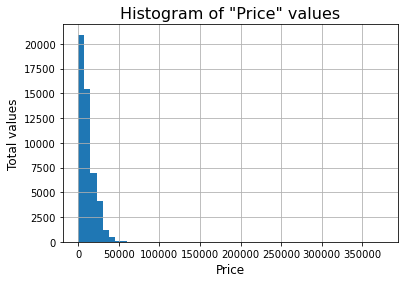

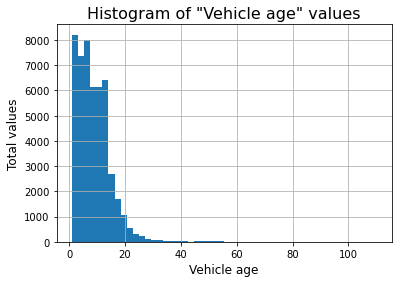

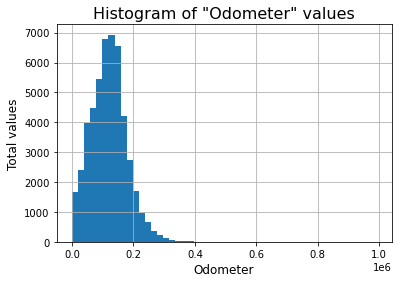

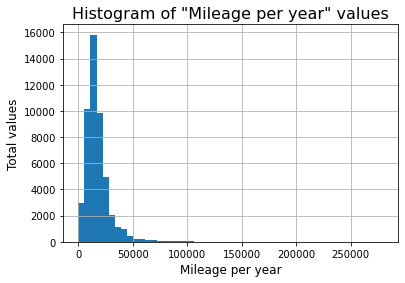

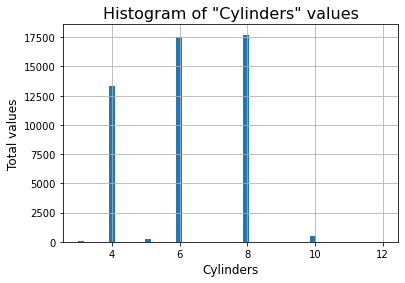

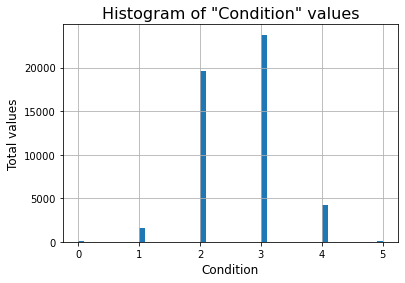

In [37]:
# make a list of quantitative columns I need to explore via plotting histograms:

hist_columns = ['price', 'vehicle_age', 'odometer', 'mileage_per_year', 'cylinders', 'condition']

# plot histograms via loop to take a first look:
for column in hist_columns:
    data[column].hist(bins = 50)
    plt.title('Histogram of "{}" values'.format(column.replace('_',' ').capitalize()), fontsize = 16)
    plt.xlabel(column.replace('_',' ').capitalize(), fontsize = 12)
    plt.ylabel('Total values', fontsize = 12)
    plt.show()

**Notes**:

* **Values distribution**: most *prices* are from 0 to 30-35,000; most *ages* are from 0 to 20 years; most of *odometer* values are between 40 and 160 thousand kilometers, with pretty and predictable gaussian distribution; most of *mileage per year* values are sitting between 5 and 30 thousand. <br>In *'cylinders'* and *'condition'* values seem to be distributed between the few categories: most of vehicles have 4, 6 or 8 cylinders, and are in good or excellent condition.


* **Price, vehicle age, odometer and yearly mileage, conclusions**: looks like all those columns have long tails of high values because of which I can't see actual value distribution. Also I want to check 'price' lowest values to see if everything sits right: it's histogram has very high peak at prices 0-10,000. 


* **Cylinders and condition, conclusions**: I will count unique values and check, maybe it will be better to unite some categories. Especially cylinders, because of those really low-counted '1' and '3' cylinder values.

### Price

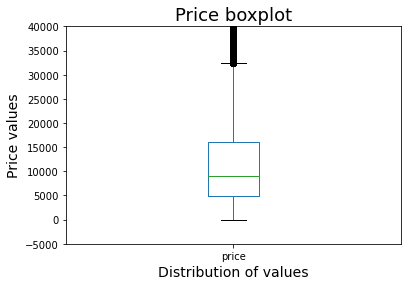

In [38]:
# look at the boxplot:
data['price'].plot(kind = 'box')
plt.ylim(-5000,40000) # 40,000 looks reasonable upper limit based on histogram
plt.title('Price boxplot', fontsize = 18)
plt.xlabel('Distribution of values', fontsize = 14)
plt.ylabel('Price values', fontsize = 14)
plt.show()

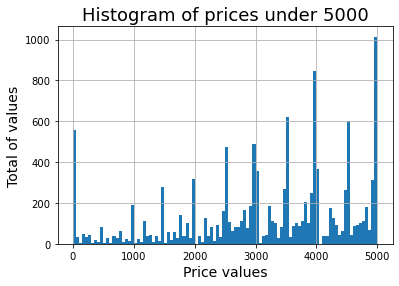

In [39]:
# look at prices below 5k (the q1):

data.query('price < 5000').price.hist(bins = 100)
plt.xlabel('Prices', fontsize = 14)
plt.title('Histogram of prices under 5000', fontsize = 18)
plt.xlabel('Price values', fontsize = 14)
plt.ylabel('Total of values', fontsize = 14)
plt.show()

### Vehicle age, odometer, mileage per year

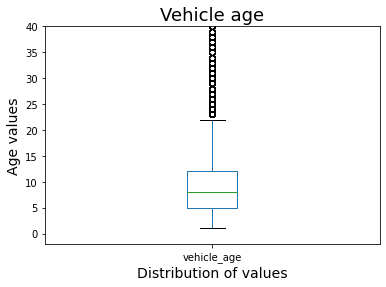

In [40]:
# vehicle age:
data['vehicle_age'].plot(kind = 'box')
plt.ylim(-2,40) # 40 looks reasonable upper limit based on histogram
plt.title('Vehicle age', fontsize = 18)
plt.xlabel('Distribution of values', fontsize = 14)
plt.ylabel('Age values', fontsize = 14)
plt.show()

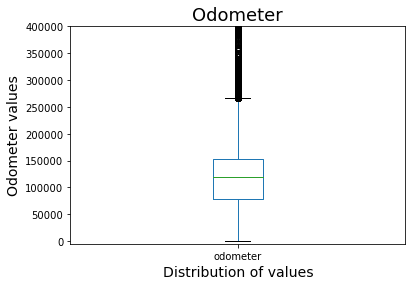

In [41]:
# odometer:
data['odometer'].plot(kind = 'box')
plt.ylim(-5000,400000) # 400k looks reasonable upper limit based on histogram
plt.title('Odometer', fontsize = 18)
plt.xlabel('Distribution of values', fontsize = 14)
plt.ylabel('Odometer values', fontsize = 14)
plt.show()

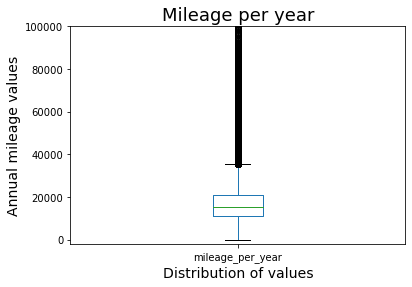

In [42]:
# mileage per year:
data['mileage_per_year'].plot(kind = 'box')
plt.ylim(-2000,100000) # 100k looks reasonable upper limit based on histogram
plt.title('Mileage per year', fontsize = 18)
plt.xlabel('Distribution of values', fontsize = 14)
plt.ylabel('Annual mileage values', fontsize = 14)
plt.show()

**Notes**:

* *Price*: the upper whisker of boxplot ends somewhere near 33,000, so I will round the upper limit to 35,000. Based on zoomed in boxplot, I will set the lower limit of price at 500. 

* *Vehicle age*: based on boxplot, I am going to set it from 0 to 25 (a little rounded up).

* *Odometer*: based on boxplot, I am going to set limits for it from 0 to 250,000.

* *Mileage per year*: by boxplot, it should be from 0 to 40,000.

### Cylinders and condition

In [43]:
# look at unique values in cylinders

data.cylinders.value_counts()

8     17714
6     17536
4     13353
10      468
5       271
3        29
12        2
Name: cylinders, dtype: int64

In [44]:
# unite categories:
data.cylinders.replace({
    3:4, # it will be one category for 4 or less
    12:10 # one category for 10 and more
}, inplace = True)

# take a look:
data.cylinders.unique()

array([ 6,  4,  8,  5, 10], dtype=int64)

In [45]:
# look at values in 'condition':
data.condition.value_counts()

3    23778
2    19604
4     4206
1     1605
0      111
5       69
Name: condition, dtype: int64

**Notes**:

* In 'cylinders' I've seen two categories with small amount of values, so I united them with the categories closest to them numerically. 

In [46]:
# filter data by criteria I set upper:
data_filtered = data.query(
    '500 <= price <= 35000 & vehicle_age <= 25 & odometer <= 250000 & mileage_per_year <= 40000'
)

### Histograms for the filtered data

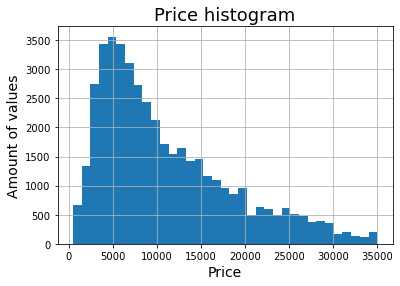

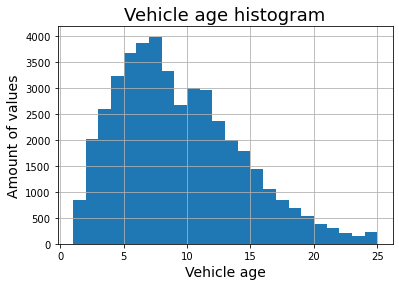

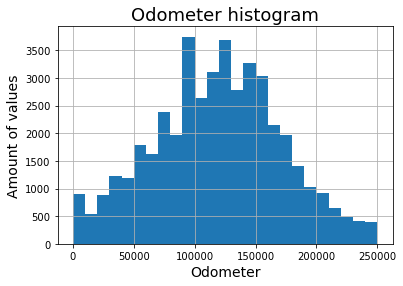

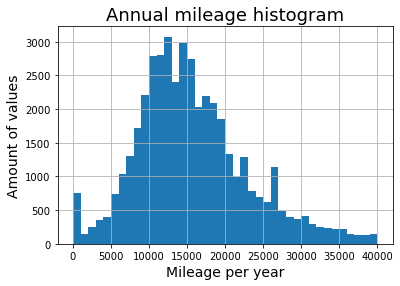

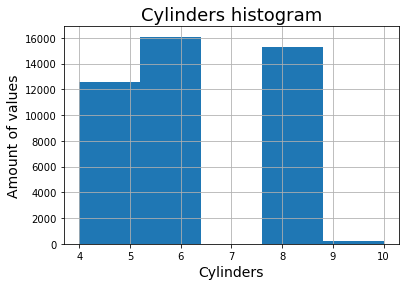

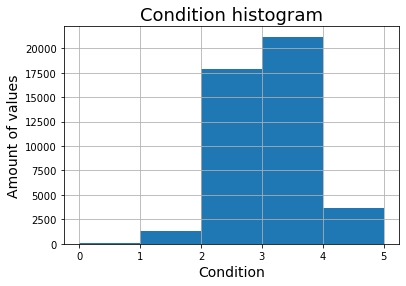

In [47]:
# I am not doing it via loop because I want set different amount of bins for each

# Price
data_filtered[hist_columns[0]].hist(bins = 35)
plt.title('Price histogram', fontsize = 18)
plt.ylabel('Amount of values', fontsize = 14)
plt.xlabel(hist_columns[0].replace('_',' ').capitalize(), fontsize = 14)
plt.show()

# Vehicle age
data_filtered[hist_columns[1]].hist(bins = 24)
plt.title('Vehicle age histogram', fontsize = 18)
plt.ylabel('Amount of values', fontsize = 14)
plt.xlabel(hist_columns[1].replace('_',' ').capitalize(), fontsize = 14)
plt.show()

# Odometer
data_filtered[hist_columns[2]].hist(bins = 25)
plt.title('Odometer histogram', fontsize = 18)
plt.ylabel('Amount of values', fontsize = 14)
plt.xlabel(hist_columns[2].replace('_',' ').capitalize(), fontsize = 14)
plt.show()

# Mileage per year
data_filtered[hist_columns[3]].hist(bins = 40)
plt.title('Annual mileage histogram', fontsize = 18)
plt.ylabel('Amount of values', fontsize = 14)
plt.xlabel(hist_columns[3].replace('_',' ').capitalize(), fontsize = 14)
plt.show()

# Cylinders
data_filtered[hist_columns[4]].hist(bins = 5)
plt.title('Cylinders histogram', fontsize = 18)
plt.ylabel('Amount of values', fontsize = 14)
plt.xlabel(hist_columns[4].replace('_',' ').capitalize(), fontsize = 14)
plt.show()

# Condition
data_filtered[hist_columns[5]].hist(bins = 5)
plt.title('Condition histogram', fontsize = 18)
plt.ylabel('Amount of values', fontsize = 14)
plt.xlabel(hist_columns[5].replace('_',' ').capitalize(), fontsize = 14)
plt.show()

In [48]:
# check odometer peak values
print(data_filtered.query('90000 < odometer < 100000').odometer.head())

15    99840
42    99840
46    90302
66    99840
69    97510
Name: odometer, dtype: int32


In [49]:
# check for amount of recurring values:
print('Total amount of 99840 values: ', len(data_filtered.query('odometer == 99840')))


Total amount of 99840 values:  643


In [50]:
# look closer at mileage per year:
data_filtered.mileage_per_year.describe()

count    44159.000000
mean     15708.259449
std       7341.052387
min          0.000000
25%      10759.000000
50%      14618.000000
75%      19720.500000
max      40000.000000
Name: mileage_per_year, dtype: float64

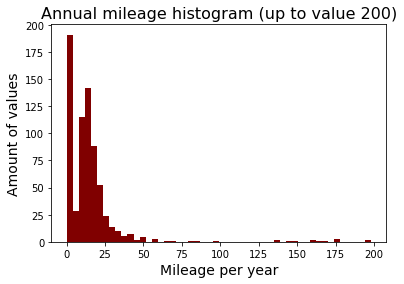

In [51]:
# check histogram of lower values at this column:
data_filtered.query('mileage_per_year <= 200').mileage_per_year.plot(kind = 'hist', bins = 50, color = 'maroon')
plt.title('Annual mileage histogram (up to value 200)', fontsize = 16)
plt.ylabel('Amount of values', fontsize = 14)
plt.xlabel(hist_columns[3].replace('_',' ').capitalize(), fontsize = 14)
plt.show()

In [52]:
# check if this amount of low mileage values has something to do with condition:
print(round(data_filtered.query('mileage_per_year <= 50').condition.value_counts() / data_filtered.condition.value_counts(),2))
print()
print(round(len(data_filtered.query('mileage_per_year <= 50')) / len(data_filtered),2))

0    0.02
1    0.01
2    0.02
3    0.01
4    0.02
5    0.06
Name: condition, dtype: float64

0.02


In [53]:
# the distribution of values is even and corellating to overall data, so I still don't have explanation for those values.
# and because we are talking about only 2% of the dataset, I would prefer to remove them for good

data_filtered = data_filtered.query('mileage_per_year >= 50')

**Notes**:

* *Price*: nice and consistent histogram, in which in values up to 5,000 the prices are rising fast, and then they gradually decline. 

* *Vehicle_age*: the ages are rising constantly up to 6 years, then the decline starts. The decline is consistent for most, except for small drop in values amount (compared to overall picture) around 8 years.

* *Odometer*: the graph looks good for most, except for peaks in amount of values right in the middle (for example, around 100k). I think those values peaked because of filling empty values with averages, which caused for large amount of exactly the same values. 

* *Mileage per year*: this value had an unusual spike in low values and I could not find explanation for it, so I removed lowest values (around 2% of overall data).

* *Cylinders*: the representation of cylinders in cars more or less corellates overall known picture: very little of 7-cylinder and 10-or-more-cylinder cars (which are known to be less popular) and more or less even amount of other.

* *Condition*: most of the cars are in excellent and good condition. Also there are smaller amount of 'like new' or 'new' cars, and even smaller of 'fair' and 'salvage'.

### Days listed

In [54]:
# numerical description:

data_filtered.days_listed.describe()

count    43480.000000
mean        39.588730
std         28.256933
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

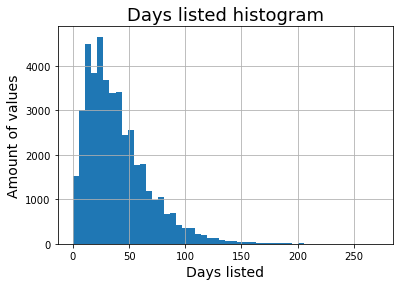

In [55]:
# histogram
data_filtered.days_listed.hist(bins = 50)
plt.title('Days listed histogram', fontsize = 18)
plt.ylabel('Amount of values', fontsize = 14)
plt.xlabel('Days listed', fontsize = 14)
plt.show()

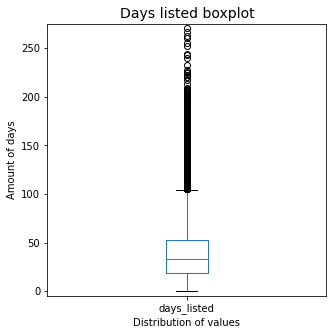

In [56]:
# mean looks somewhat higher than median. Now for the boxplot:

data_filtered.days_listed.plot(kind = 'box',figsize = (5,5))
plt.ylim(-5,275)
plt.title('Days listed boxplot', fontsize = 14)
plt.xlabel('Distribution of values')
plt.ylabel('Amount of days')
plt.show()

**Notes**:

Our average ad is listed for 20 to 50 days. Ads that was removed from day 0 to 20 were removed quickly, and ads that lasted from 50 to 105 days lasted longer than average. Ads that lasted for more than 105 days are clearly an outliers. Maybe the price was too high or condition too bad so no one wanted to buy them. 

I will take a look at those outliers before removing them for good.

In [57]:
# the share of those outliers in overall dataset
print(round(len(data_filtered.query('days_listed > 105')) / len(data_filtered), 3))
print()

# taking a look:
data_filtered.query('days_listed > 105').sort_values('days_listed', ascending = False).head()

0.03



,price,model_year,model,condition,cylinders,odometer,is_4wd,transmission,type,paint_color,date_posted,days_listed,day_of_week,month,year,vehicle_age,mileage_per_year
4360,5200,2011,chevrolet impala,4,6,122000,False,automatic,sedan,unknown,2018-05-24,271,Thursday,May,2018,7,17428
28756,5500,2011,nissan versa,3,4,96000,False,automatic,hatchback,blue,2019-01-08,267,Tuesday,January,2019,8,12000
2224,5995,2004,ford f-250,2,8,103000,True,automatic,truck,red,2019-01-24,263,Thursday,January,2019,15,6866
51,3800,2012,ford focus,2,4,130323,False,automatic,sedan,black,2018-11-29,261,Thursday,November,2018,6,21720
7875,8980,2013,nissan altima,3,6,101611,False,automatic,coupe,blue,2019-02-02,256,Saturday,February,2019,6,16935


In [ ]:
# I do see some high odometer values and the condition values are lower than average. 
# Also the price in those values looks really low, most likely because no one wanted to buy those cars.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-Contents:)

### Prices analysis

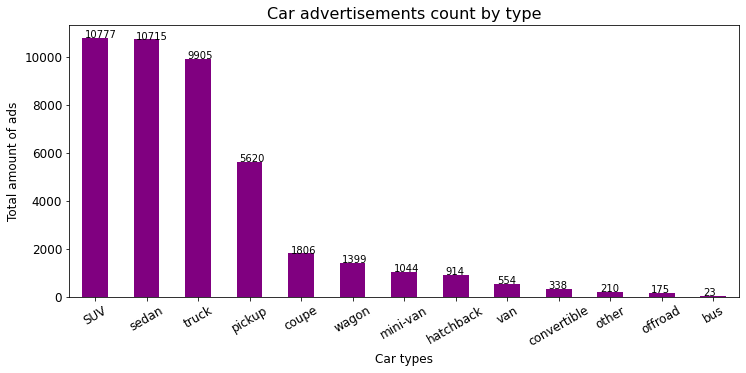

In [58]:
# variable for counting the values (I need it also for writing exact numbers over each bar)
ads_by_type = data_filtered.type.value_counts().sort_values(ascending = False)

data_filtered.groupby('type').type.count().sort_values(ascending = False).plot(
    kind = 'bar', rot = 30, figsize = (12,5), fontsize = 12, color = 'purple')
plt.title('Car advertisements count by type', fontsize=16)
plt.ylabel('Total amount of ads', fontsize=12)
plt.xlabel('Car types', fontsize=12)

for i, (x, y) in enumerate(ads_by_type.to_dict().items()):
    plt.text(i -0.2, y, s=str(round(y, 2)), fontsize=10)
    
plt.show()

**Notes**:

SUV's and sedans are listed in greatest number of ads, so I will proceed with those two types.

### SUV prices

In [59]:
# separate dataframe with the columns I plan to analyze and leaving only ads with SUV type cars.
suv_data = data_filtered.query('type == "SUV"')[
    ['model', 'condition', 'vehicle_age', 'odometer', 'mileage_per_year', 'paint_color', 'transmission', 'price']]

suv_data.head()

,model,condition,vehicle_age,odometer,mileage_per_year,paint_color,transmission,price
0,bmw x5,2,7,145000,20714,unknown,automatic,9400
7,honda pilot,3,6,109473,18245,black,automatic,15990
8,kia sorento,3,6,104174,17362,unknown,automatic,11500
9,honda pilot,3,11,147191,13381,blue,automatic,9200
14,gmc yukon,3,10,132285,13228,black,automatic,12990


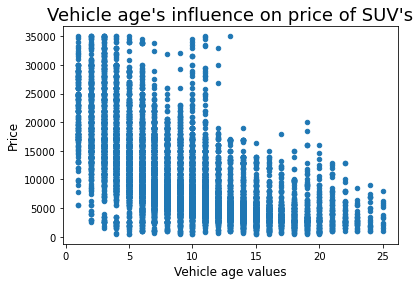

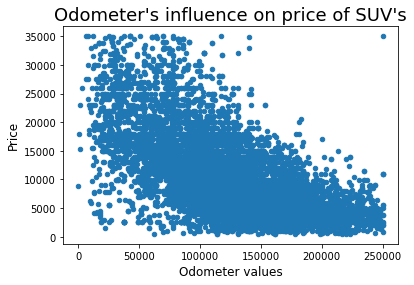

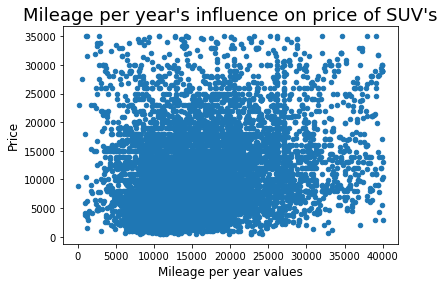

In [60]:
# list of numerical columns for scatterplots; will be also useful later while analizing sedan data
num_columns = ['vehicle_age', 'odometer', 'mileage_per_year'] 

for column in num_columns: # loop for creating scatterplots
    suv_data.plot(kind = 'scatter', x = column, y = 'price')
    title = column.replace('_', ' ').capitalize()
    plt.title("{}'s influence on price of SUV's".format(title), fontsize = 18)
    plt.ylabel('Price', fontsize=12)
    plt.xlabel('{} values'.format(title), fontsize=12)
    plt.show()

In [61]:
# look at correllation matrix
suv_data.corr()

,condition,vehicle_age,odometer,mileage_per_year,price
condition,1.000000,-0.287881,-0.310136,0.073733,0.276854
vehicle_age,-0.287881,1.000000,0.637878,-0.640449,-0.619636
odometer,-0.310136,0.637878,1.000000,0.011437,-0.635404
mileage_per_year,0.073733,-0.640449,0.011437,1.000000,0.275577
price,0.276854,-0.619636,-0.635404,0.275577,1.000000


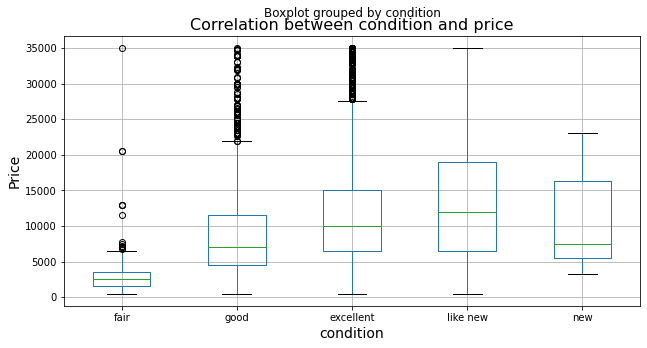

In [62]:
# look at the condition values via a boxplot; i exclude 0 because there are only 14 of those values:
suv_data.query('condition != 0')[['price', 'condition']].boxplot(figsize=(10, 5), by='condition', rot = 0)
plt.title('Correlation between condition and price', fontsize = 16)
plt.ylabel('Price', fontsize = 14)
plt.xlabel('condition', fontsize = 14)
plt.xticks([1, 2, 3, 4, 5], ['fair', 'good', 'excellent', 'like new', 'new'])

plt.show()

In [63]:
# numerical description of prices by pain color
suv_data.groupby('paint_color')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
paint_color,,,,,,,,
black,1855.0,12097.011860,7321.448154,500.0,6000.00,10950.0,15995.00,34600.0
blue,924.0,8389.143939,5610.151358,500.0,4500.00,6950.0,10499.25,34988.0
brown,339.0,8506.622419,5614.666684,500.0,4000.00,7399.0,11800.00,34988.0
custom,258.0,9873.511628,6004.654167,800.0,5961.25,8495.0,12990.00,35000.0
green,382.0,8096.321990,5546.890610,500.0,3500.00,6000.0,11971.25,25950.0
grey,1052.0,10252.919202,6924.879283,500.0,4995.00,8412.5,13708.75,34994.0
orange,74.0,15263.729730,6569.972582,900.0,10239.75,16900.0,17372.25,30000.0
purple,36.0,6808.888889,4151.835882,1000.0,4995.00,5550.0,8620.00,19995.0
red,814.0,9479.463145,6320.935306,600.0,4592.50,7600.0,12995.00,34999.0


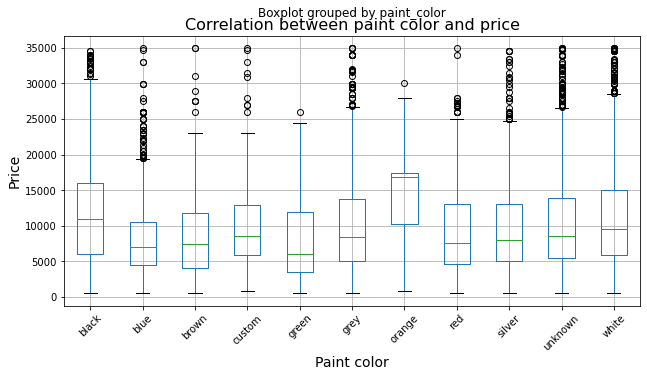

In [64]:
# Paint color boxplot; there are too little of purple and yellow, and 'other' isn't informative enough, so I exclude them.
suv_data.query('paint_color != ["purple", "yellow", "other"]')[['price', 'paint_color']].boxplot(figsize=(10, 5), by='paint_color', rot = 45)
plt.title('Correlation between paint color and price', fontsize = 16)
plt.ylabel('Price', fontsize = 14)
plt.xlabel('Paint color', fontsize = 14)
plt.show()

In [65]:
# numerical description of prices by transmission
suv_data.groupby('transmission')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,10232.0,10286.148554,6796.476027,500.0,5000.0,8498.5,13990.0,35000.0
manual,456.0,11695.506579,6580.207269,500.0,6400.0,10995.0,16491.0,31500.0
other,89.0,12589.011236,5826.646579,2000.0,7995.0,12900.0,16950.0,28999.0


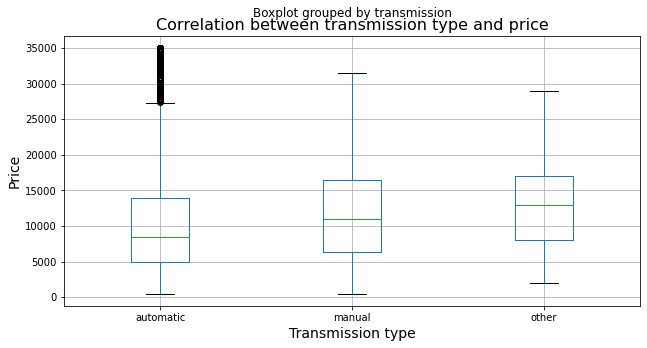

In [66]:
# Transmission type boxplot
suv_data[['price', 'transmission']].boxplot(figsize=(10, 5), by='transmission', rot = 0)
plt.title('Correlation between transmission type and price', fontsize = 16)
plt.ylabel('Price', fontsize = 14)
plt.xlabel('Transmission type', fontsize = 14)
plt.show()

### SUV conclusion:

* *Vehicle's age*: I see negative correlation, meaning the lower the car's age, the higher the price. 


* *Odometer*: though at the lower odometer values there are many outliers, here I also see reverse connection: as the odometer value lowers, the price climbs up. 


* *Mileage per year*: unexpectedly, the higher prices are for vehicle with middle mileage: if I ignore the isolated dots, the peak appears to be somewhere between 10 and 20 thousand per year. It is also confirmed by correlation coefficient, which shows small positive correlation. 


* *Condition*: the better the condition, the higher the price: like new and new vehicles are the most expensive, and vehicles in fair condition are the cheapest. There are a lot of very high values in 'excellent' category too, but according to boxplot they should be treated as outliers, and the q3 + 1.5iqr is still considerably higher for the 'like new' and 'new'.


* *Paint color*: orange seems to be the most expensive, but it is quite irrational and after examining total amount of orange car ads I prefer to discount this color: though 63 is higher than 50, it is still highly unlikely for orange color to be that popular and therefore the result must be distorted because of little amount of data. If I exclude orange, the most expensive color is black, and second expensive is white. The cheapest color is blue.


* *Transmission*: most of the automatic high price values are considered outliers, so in this category manual transmission vehicles are slightly more expensive.

### Sedan prices

In [67]:
# separate dataframe with the columns I plan to analyze and leaving only ads with sedan type cars.
sedan_data = data_filtered.query('type == "sedan"')[
    ['model', 'condition', 'vehicle_age', 'odometer', 'mileage_per_year', 'paint_color', 'transmission', 'price']]

sedan_data.head()

,model,condition,vehicle_age,odometer,mileage_per_year,paint_color,transmission,price
2,hyundai sonata,4,6,110000,18333,red,automatic,5500
5,chrysler 300,3,4,57954,14488,black,automatic,14990
6,toyota camry,3,3,79212,26404,white,automatic,12990
11,honda accord,3,7,111142,15877,grey,automatic,8990
13,hyundai sonata,3,1,22104,22104,silver,automatic,16500


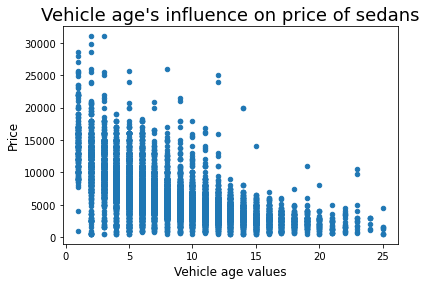

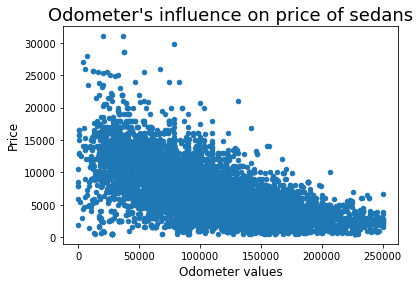

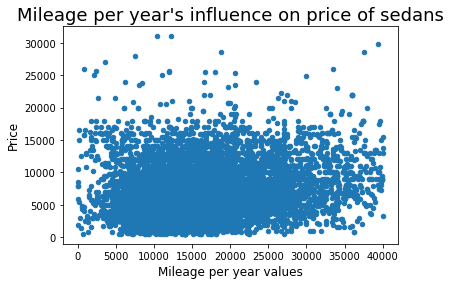

In [68]:
# I excluded 'condition', it is better to be examined by boxplot
for column in num_columns: # loop for creating scatterplots
    sedan_data.plot(kind = 'scatter', x = column, y = 'price')
    title = column.replace('_', ' ').capitalize()
    plt.title("{}'s influence on price of sedans".format(title), fontsize = 18)
    plt.ylabel('Price', fontsize=12)
    plt.xlabel('{} values'.format(title), fontsize=12)
    plt.show()

In [69]:
# look at correllation matrix
sedan_data.corr()

,condition,vehicle_age,odometer,mileage_per_year,price
condition,1.000000,-0.261800,-0.305394,0.045831,0.304495
vehicle_age,-0.261800,1.000000,0.622120,-0.589224,-0.647256
odometer,-0.305394,0.622120,1.000000,0.104731,-0.645171
mileage_per_year,0.045831,-0.589224,0.104731,1.000000,0.233698
price,0.304495,-0.647256,-0.645171,0.233698,1.000000


In [70]:
# numerical description of prices by condition
sedan_data.groupby('condition')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
0,34.0,3338.529412,2608.272251,600.0,1500.0,2800.0,4475.0,9975.0
1,255.0,2107.682353,1503.961215,500.0,1000.0,1600.0,2550.0,11000.0
2,3994.0,5664.054832,3118.624617,500.0,3500.0,4995.0,6995.0,28500.0
3,5327.0,7451.762155,3771.008011,500.0,4695.0,6800.0,9800.0,31000.0
4,1079.0,8307.616311,4515.490326,500.0,4995.0,7495.0,10998.5,28000.0
5,26.0,8373.576923,5374.734875,1500.0,4762.5,7050.0,9750.0,26000.0


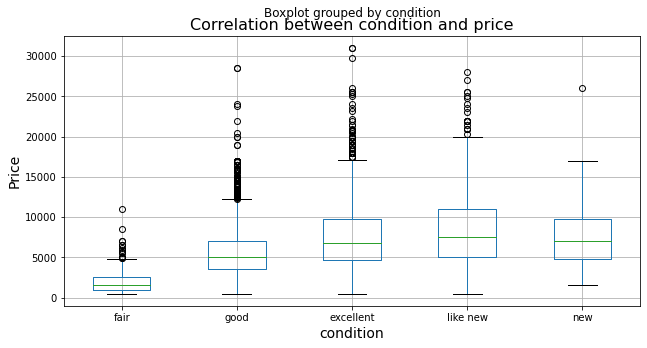

In [71]:
# look at the condition values via a boxplot; i exclude 0 because there are only 14 of those values:
sedan_data.query('condition != 0')[['price', 'condition']].boxplot(figsize=(10, 5), by='condition', rot = 0)
plt.title('Correlation between condition and price', fontsize = 16)
plt.ylabel('Price', fontsize = 14)
plt.xlabel('condition', fontsize = 14)
plt.xticks([1, 2, 3, 4, 5], ['fair', 'good', 'excellent', 'like new', 'new'])

plt.show()

In [72]:
# numerical description of prices by pain color
sedan_data.groupby('paint_color')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
paint_color,,,,,,,,
black,1554.0,7311.790862,3991.402306,500.0,4295.0,6500.0,9737.5,26988.0
blue,1113.0,6180.996406,3459.060223,500.0,3896.0,5500.0,7913.0,20870.0
brown,243.0,5140.341564,3070.392454,800.0,2995.0,4498.0,6900.0,22199.0
custom,248.0,6731.495968,4087.374757,500.0,3687.5,5800.0,8425.0,23995.0
green,189.0,4685.941799,3040.698265,500.0,2695.0,3900.0,5800.0,17999.0
grey,1424.0,6669.843399,3415.412385,600.0,4200.0,5995.0,8500.0,29777.0
orange,7.0,7363.571429,4698.560838,1950.0,4450.0,5995.0,9351.0,15998.0
purple,23.0,6229.217391,3402.589040,750.0,3937.5,5495.0,7897.5,13991.0
red,837.0,6890.457587,3864.613883,500.0,3999.0,5995.0,8995.0,25000.0


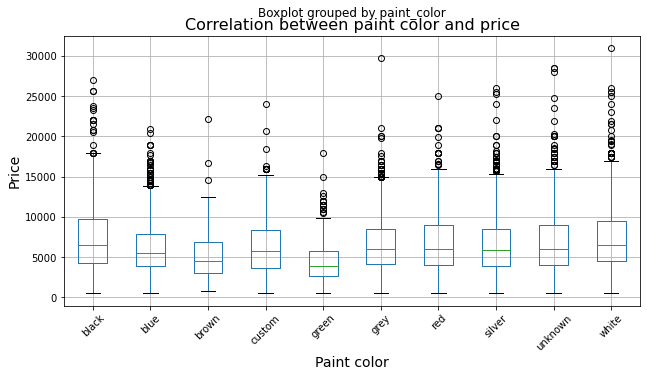

In [73]:
# paint color boxplot
# there are too little of purple, orange and yellow, and 'other' isn't informative enough, so I exclude them.
sedan_data.query('paint_color != ["purple", "yellow", "other", "orange"]')[['price', 'paint_color']].boxplot(figsize=(10, 5), by='paint_color', rot = 45)
plt.title('Correlation between paint color and price', fontsize = 16)
plt.ylabel('Price', fontsize = 14)
plt.xlabel('Paint color', fontsize = 14)
plt.show()

In [74]:
# numerical description of prices by transmission
sedan_data.groupby('transmission')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,10128.0,6808.229858,3796.370114,500.0,3995.0,5995.0,8950.00,31000.0
manual,527.0,5255.774194,3382.674182,500.0,2950.0,4500.0,6550.00,25000.0
other,60.0,7113.783333,3667.468785,1800.0,4850.0,5969.0,8812.25,20700.0


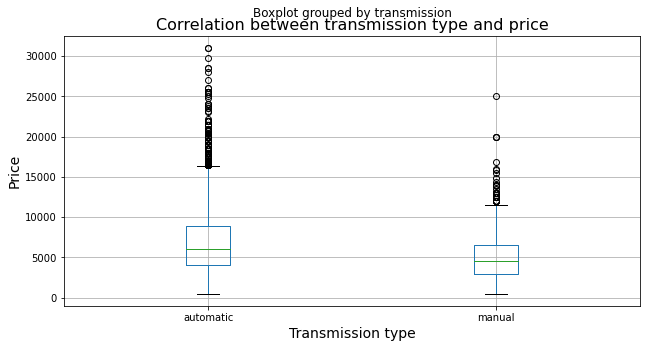

In [75]:
# Transmission type boxplot
# I exclude 'other' because it has too little values
sedan_data.query('transmission != "other"')[['price', 'transmission']].boxplot(figsize=(10, 5), by='transmission', rot = 0)
plt.title('Correlation between transmission type and price', fontsize = 16)
plt.ylabel('Price', fontsize = 14)
plt.xlabel('Transmission type', fontsize = 14)
plt.show()

### Sedan conclusion:

* *Vehicle's age*: there is quite strong negative correlation between price and vehicle's age: the price grows as the vehicle's age declines.


* *Odometer*: odometer values are also have negative correlation to price values, and the lower odometer value is, the higher would be the price. 


* *Mileage per year*: in sedans mileage also has mild positive correlation with price values. The prices peak seem to appear somewhere between mileage 7500 and 17500 values.


* *Condition*: condition and prices have mild positive correlation, so the better condition is, the higher would be the price.


* *Paint color*: like with the SUV's, in sedans the most expensive color is also the black, and the second expensive is white. But the cheapest sedan color is green. 


* *Transmission*: sedans with automatic transmissions are considerably more expensive than those with manual transmission.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-Contents:)

## Overall conclusion

In this assignment I had to analyze car ads that was posted at online platform. I had to find which factors influence the price the most.

First, I had to preprocess the data: I filled or disposed of empty cells, categorized free text values, checked for duplicates (surprisingly, there was none), identified outliers using explorative graphical analysis tools and filtered them out.

Then I checked what types of cars are most popular and conducted analysis on them. Here are my findings:


 * In both categories vehicle's age and odometer values have the strongest influence on price: the lower they are, the higher the price.
 
 
 * There is no straightforward correlation between annual mileage and price, but there are some ranges of mileage values in each type category in which prices are higher. For SUV's it's roughly 10 to 20 thousand per year, and for sedan - 7.5 to 17.5 thousand per year.
 
 
 * Condition affects price, but not as strongly as I would expect. There are other factors that more imporant (like vehicle's age and odometer values).
 
 
 * The most expensive cars in both car types are black, and then white. 
 
 
 * The main difference in how price influenced in SUV's and sedans is that in SUV manual transmission cars are slightly more expensive, and to the contrary, in sedans manual transmission cars are significantly cheaper.
 
 
 * Typical most expensive car is black, it has low age (the closer to 0, the better), low odometer value (same here), it is in an excellent (or better) condition, and it has annual mileage is somewhere between 10 to 17.5 thousand.
 
 
 * To the contrary, typical cheap car would be with extremely high odometer values (around 250k), 25 years old and in bad condition. It's annual mileage would be over 30 thousand.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-Contents:)